# DS 3000 - Assignment 11

**Student Name**: [Julia Ouritskaya]

**Date**: [11/19/2023]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Assignment 11 (50 pts)

Create a SVM classifier to predict the onset of diabetes using the Pima Indians Diabetes Database. Information on the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) can be obtained directly from kaggle.com. The link also contains the description of each field in the dataset.

Download the diabetes.csv dataset and use it to answer the questions below

**Note: ensure that your work is reproducible.**

## Question 1 (5 pts)

Load the dataset “diabetes.csv”, view the dimensions of the data, and gather summary statistics. Comment on your observations about the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
diabetes_df = pd.read_csv('diabetes.csv')

In [3]:
# View the dimenions of the data
diabetes_df.shape

(768, 9)

In [4]:
# Gather summary statistics
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The diabetes dataset contains 768 observations with 9 different diagnostic features spanning from the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. The summary statistics reveal the following:
- `Pregnancies` has a moderate range with a minimum of 0.00 and a maximum of 17.00. On average, patients had around 4 pregancies. 
- `Glucose`, `Blood Pressure`, `SkinThickness`, `Insulin`, and `BMI` all have wider ranges, each with a minimum of 0. This value doesn't align with normal diagnostic measurements you would see in a patient which could indicate missing/unknown values. The standard deviations for these features are also relatively high which demonstrates that there is considerable variability in these measurements.
- `Age` varies pretty widely as well with a minimum patient age of 21 years old and a maximum of 81 years old. The median of the dataset is individuals in their mid-30s. 
- `Outcome` is the target variable which classifies whether or not a patient has diabetes (0 or 1). 

## Question 2 (5 pts)

Create two visualizations that demonstrate univariate and/or pairwise patterns in the data. Comment on the patterns.

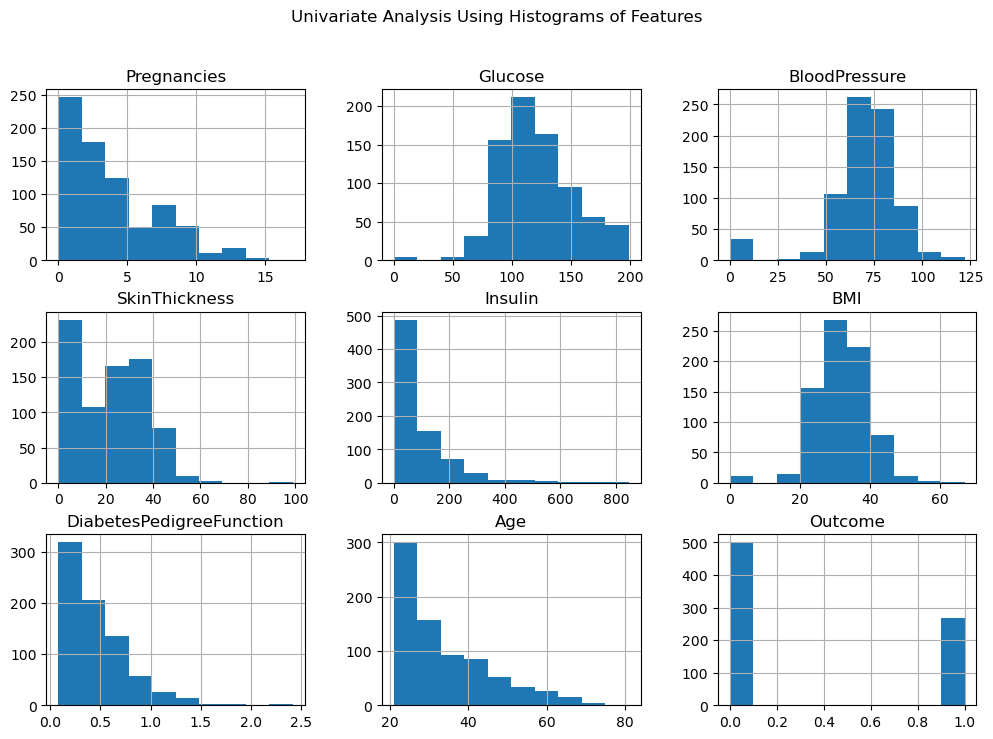

In [5]:
# Create a visualization that demonstrates univariate patterns in the data
diabetes_df.hist(figsize=(12,8))
plt.suptitle('Univariate Analysis Using Histograms of Features')
plt.show()

This visualization demonsrates the univariate patterns in the diabetes dataset across all of the features:
- `Pregnancies`: Most patients have less than 5 pregnancies, with the frequency decreasing as the number of pregancies increases.
- `Glucose`, `BloodPressure`, `BMI`: These histograms indicate a normal distribution, with most patients having glucose levels concentrated around 100-125, diastolic blood pressure around 60-80, and BMI around 25-40.
- `SkinThickness`, `Insulin`, `DiabetesPedigreeFunction`: These histograms have a right-skewed distribution, demonsrating that higher values are less frequent.
- `Age`: This histogram also has a right-skewed distribution with most indiviuals in the 20-30 age range.
- `Outcome`: There is a higher frequency of non-diabetic cases (0) compared to diabetic cases (1). 

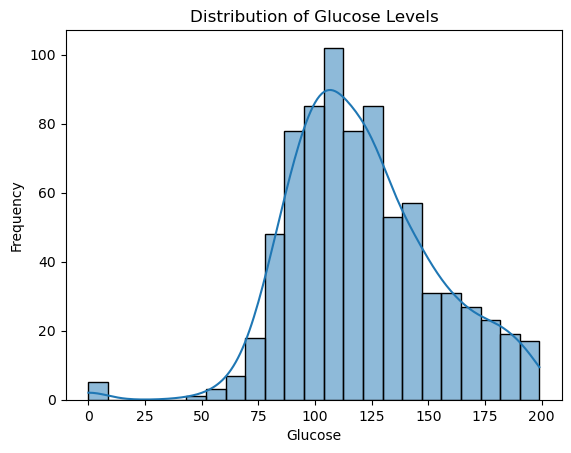

In [6]:
# Create a visualization that demonstrates univariate patterns (Glucose)
sns.histplot(diabetes_df['Glucose'], kde=True)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

This visualization demonstrates the distribution of `Glucose` levels in the diabetes dataset. The distribution of glucose levels appears to be relatively normal, with a small right skew. Most patients have a plasma glucose concentration around 100 to 125. There is a small amount of patients with very low glucose levels, close to 0, which could indicate data errors.

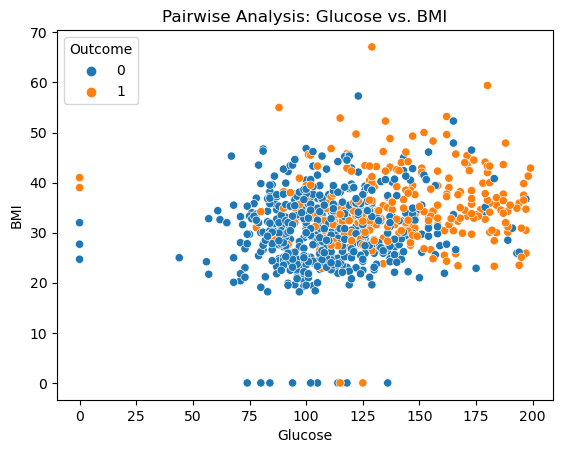

In [7]:
# Create a visualization that demonstrates pairwise patterns in the data (Glucose vs. BMI)
sns.scatterplot(data=diabetes_df, x='Glucose', y='BMI', hue='Outcome')
plt.title('Pairwise Analysis: Glucose vs. BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

This visualization demonstrates the pairwise patterns in the diabetes dataset, specifically between `Glucose` and `BMI`, colored by the outcome (whether they were diagnosed with diabetes or not). Overall, patients with higher glucose levels and higher BMI tend to have diabetes indicated by the orange points. However, there is no clear boundary separating the two outcomes based solely on glucose and BMI which highlights the complexity of diabetes and how other factors are also influential in its diagnosis. 

## Question 3 (5 pts)

Evaluate the data for missing or invalid values. Then prepare the data, and ensure that you handle missing and invalid values (if they exist).

In [8]:
# Evaluate the data for missing values 
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
(diabetes_df['BloodPressure'] == 0).sum()

35

In [10]:
(diabetes_df['Glucose'] == 0).sum()

5

In [11]:
(diabetes_df['BMI'] == 0).sum()

11

In [12]:
(diabetes_df['SkinThickness'] == 0).sum()

227

In [13]:
(diabetes_df['Insulin'] == 0).sum()

374

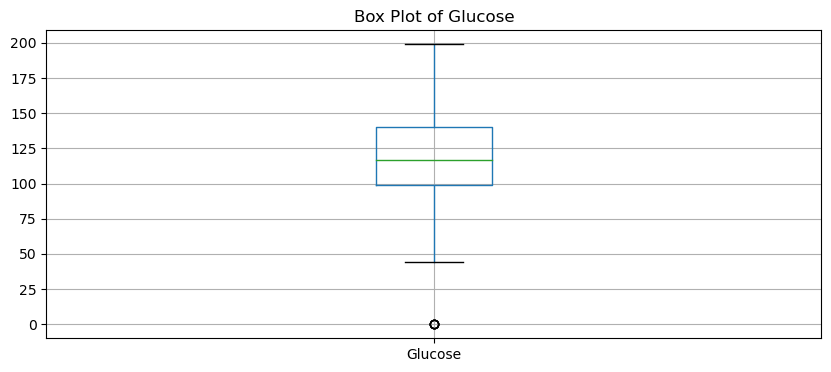

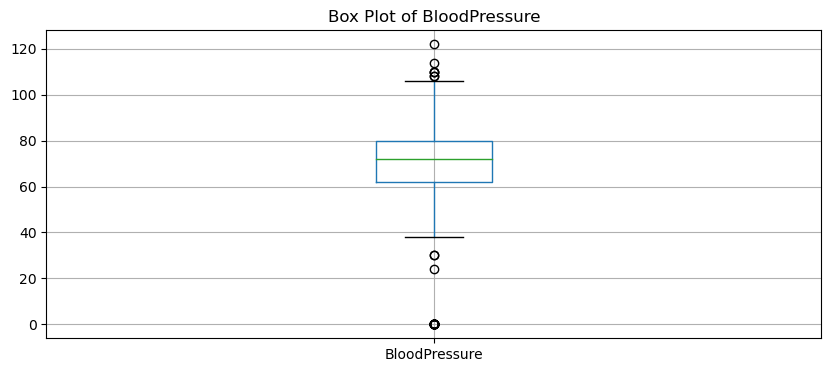

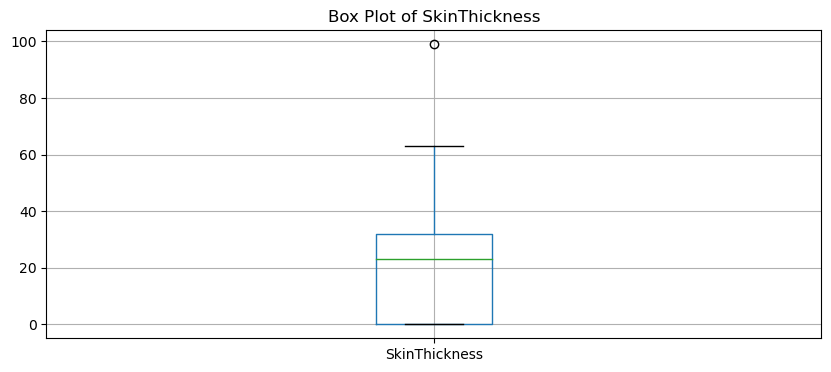

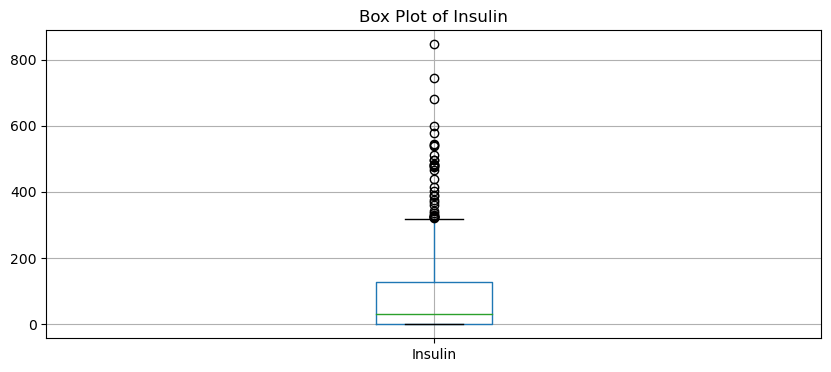

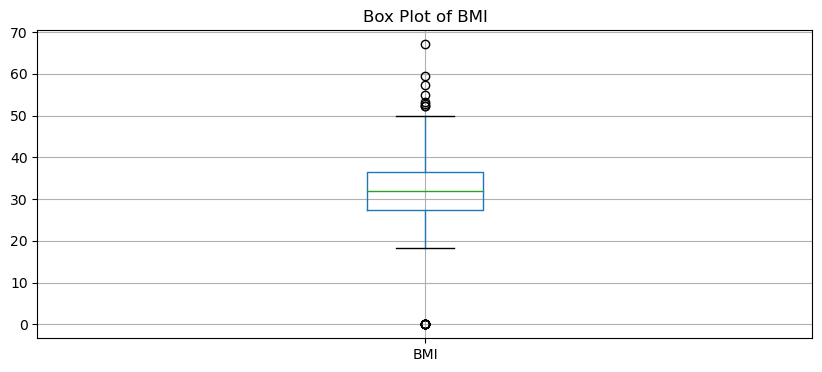

In [14]:
# Create a list of columns with invalid zero values
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Plot boxplots for each of the columns
for col in zero_columns:
    plt.figure(figsize=(10, 4))
    diabetes_df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

In [15]:
# Replace zeros with mean for features with fewer outliers
diabetes_df['Glucose'].replace(0, diabetes_df['Glucose'].mean(), inplace=True)
diabetes_df['BloodPressure'].replace(0, diabetes_df['BloodPressure'].mean(), inplace=True)

# Replace zeroes with median for features with greater outliers
diabetes_df['Insulin'].replace(0, diabetes_df['Insulin'].median(), inplace=True)
diabetes_df['BMI'].replace(0, diabetes_df['BMI'].median(), inplace=True)

# Replace zeroes with mode for features with very large number of outliers
mode_skin_thickness = diabetes_df['SkinThickness'].mode()[0]
diabetes_df['SkinThickness'].replace(0, mode_skin_thickness, inplace=True)

In [16]:
# Check to see if zeros have been handled
for col in zero_columns:
    num_zeros = (diabetes_df[col] == 0).sum()
    print(f'Number of zeros in {col}: {num_zeros}')

Number of zeros in Glucose: 0
Number of zeros in BloodPressure: 0
Number of zeros in SkinThickness: 227
Number of zeros in Insulin: 0
Number of zeros in BMI: 0


Although the diabetes dataset does not contain any missing vlues, some of the features including `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` have zero values, which does not make sense in a real-world context. I imputed `Glucose`, and `BloodPressure` with the mean value since there are not many extreme values as seen by the boxplots. For `Insulin` and `BMI` with large number of outliers, I imputed the zero values with the median to improve accuracy. Finally, `SkinThickness` has a large number of zeros, so I imputed with the mode.  

## Question 4 (10 pts)

Partition the data into train/test sets. After which, perform the following:
- encode any categorical data
- normalize numeric data. **Tip:** Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [17]:
# Partition the data into train/test sets
X = diabetes_df.drop('Outcome', axis=1)        # get the input features
y = diabetes_df['Outcome']                     # get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    stratify=y      #preserve the distribution of the labels
                                                   )

# Normalize numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# View the prepared data
X_train.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
424,8,151.0,78.000000,32,210.0,42.9,0.516,36
282,7,133.0,88.000000,15,155.0,32.4,0.262,37
747,1,81.0,74.000000,41,57.0,46.3,1.096,32
638,7,97.0,76.000000,32,91.0,40.9,0.871,32
621,2,92.0,76.000000,20,30.5,24.2,1.698,28
392,1,131.0,64.000000,14,415.0,23.7,0.389,21
468,8,120.0,69.105469,0,30.5,30.0,0.183,38
42,7,106.0,92.000000,18,30.5,22.7,0.235,48
232,1,79.0,80.000000,25,37.0,25.4,0.583,22
744,13,153.0,88.000000,37,140.0,40.6,1.174,39


I partitioned the data into training and test sets with 70% of the data allocated for training and 30% for testing. I normalized the numeric data to ensure all the features contribute equally to the result. The first few rows of the scaled training data show varied ranges for different features demonstrating successful scaling. 

## Question 5 (20 pts)

Build the model that predicts the target variable. Ensure that you:
- Instantiate the correct SVM model, train and evaluate it.
- Use GridSearchCV to tune at least two hyperparameters.**
- Perform cross validation. You'll need to read the documentation of the SVM algorithm to identify the hyperparameters.
- Display: 1) the best model/parameters and 2) the best score that was obtained.

In [19]:
# Instantiate the correct SVM model, train, and evaluate it
svm = SVC()

# Setup the paramter grid for hyperparamater tuning
parameters = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
}

# Use GridSearchCV to tune at least two hyperparamters and perform cross validation
svm_grid = GridSearchCV(svm, parameters, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)

# Display the best model/parameters and the best score obtained
print('Best parameters:', svm_grid.best_params_)
print(f'Best score: {svm_grid.best_score_: .2f}')

Best parameters: {'C': 1, 'gamma': 0.01}
Best score:  0.78


I used an SVM model to predict the target variable (`Outcome`). I used GridSearchCV and cross-validation to perform hyperparameter tuning. The best paramters found are C = 1 and gamma = 0.01. The highest accuracy acheived with these paramters is around 78%. This demonsrates that the model achieves its best performance with a regularization strength of 1 and a gamma value of 0.01 based on the diabetes dataset. 

## Question 6 (5 pts)

Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model. Did it accurately predict the target? Do you think the prediction from this model is useful and would you advocate for its use in the medical industry?

In [20]:
# Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems
train_score = svm_grid.score(X_train_scaled, y_train)
test_score = svm_grid.score(X_test_scaled, y_test)

print(f'Training score: {train_score: .2f}')
print(f'Test score: {test_score: .2f}')

Training score:  0.79
Test score:  0.75


In [21]:
# Instantiate the SVM model
svm = SVC()

# Setup the parameter grid for hyperparameter tuning
parameters = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01]
}

# Use GridSearchCV with cross-validation
svm_grid = GridSearchCV(svm, parameters, cv=5, scoring='accuracy', return_train_score=True)
svm_grid.fit(X_train_scaled, y_train)

# Display the best parameters and best score
print('Best parameters:', svm_grid.best_params_)
print(f'Best score: {svm_grid.best_score_: .2f}')

# Display the cross-validation results for train and test sets
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

Best parameters: {'C': 1, 'gamma': 0.01}
Best score:  0.78


,mean_train_score,std_train_score,mean_test_score,std_test_score
5,0.784921,0.010575,0.778505,0.030034
4,0.828685,0.007121,0.776653,0.026600
8,0.800745,0.006342,0.771063,0.036820
1,0.768632,0.011443,0.737470,0.025556
7,0.890132,0.008989,0.728141,0.008324


The SVM model achieved a training score of 0.79 and a test score of 0.75, which indicates a slight overfitting as the model performs better on the training data compared to the test data. Through GridSearchCV, the best parameters found were C = 1 and gamma = 0.01, with a best score of 0.78, which aligns with the test score. While the model suggests a pretty adequate tuning, more improvements could still be made. The close scores between training and testing sets demonstrate that the model has a decent balance between bias and variance, with moderate bias and low variance as indicated by the best score of 0.78 and the small difference between `mean_train_score` and `mean_test_score`. However, the overall accuracy of 75-78% suggests that the model might not be sufficient for applications in medical diagnosis in its current state. Further improvements would be necessary before advocating for its use in the medical industry, especially in predicting the onset of diabetes in individuals. 

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
